In [1]:
import torch
from tools import config, Wrapper, DatasetQuora
from modelling.models import RNNCNNMatch
from modelling.templates import SimilarityTemplate

In [2]:
%%time
dataset = DatasetQuora(train_file=config.TRAIN_FILE,
                       test_file=config.TEST_FILE, 
                       sample_submission_file=config.SAMPLE_SUBMISSION_FILE)

CPU times: user 1min 13s, sys: 544 ms, total: 1min 14s
Wall time: 1min 14s


In [3]:
rnn_cnn_match = SimilarityTemplate(
    query_model=RNNCNNMatch(), 
    vocab_size=len(dataset.token2index),
    loss_type='cross_entropy')

In [4]:
rnn_cnn_match

SimilarityTemplate(
  (query_embedding_layer): Embedding(79279, 300, padding_idx=0)
  (candidate_embedding_layer): Embedding(79279, 300, padding_idx=0)
  (query_model): RNNCNNMatch(
    (fully_connected): Linear(in_features=896, out_features=300, bias=True)
    (model): Sequential(
      (0): RNN(
        (rnn): LSTM(300, 256)
      )
      (1): CNN(
        (convolution_layer): Conv1d(256, 128, kernel_size=(1,), stride=(1,))
        (activation_function): GELU()
        (pool_layer): MaxPool1d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
      )
      (2): CNN(
        (convolution_layer): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
        (activation_function): GELU()
        (pool_layer): MaxPool1d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
      )
      (3): CNN(
        (convolution_layer): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
        (activation_function): GELU()
        (pool_layer): MaxPool1d(kernel_size=4, stride=1, pad

In [5]:
optimizer = torch.optim.Adam(rnn_cnn_match.parameters())

In [6]:
rcm = Wrapper(dataset=dataset, 
              model=rnn_cnn_match, 
              optimizer=optimizer, 
              model_name=config.MODEL_NAME, 
              max_norm=0.1,
              batch_size=32,
              cross_entropy_negative_k_ratio=1.5, 
              generate_negatives_type='random',
              validation_batch_size_multiplier=64)

Train Epoch 1:   0%|          | 0/3731 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:261: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 2:   0%|          | 2/3731 [00:00<04:11, 14.83it/s]

Epoch: [1/15] | Cross_entropy loss: 0.770 | Validation Loss: 0.456
Mean Recall: 0.76 | Validation Recall: 0.80


Train Epoch 3:   0%|          | 2/3731 [00:00<04:18, 14.45it/s]

Epoch: [2/15] | Cross_entropy loss: 0.300 | Validation Loss: 0.365
Mean Recall: 0.87 | Validation Recall: 0.85


Train Epoch 4:   0%|          | 2/3731 [00:00<04:19, 14.39it/s]

Epoch: [3/15] | Cross_entropy loss: 0.242 | Validation Loss: 0.379
Mean Recall: 0.90 | Validation Recall: 0.84


Train Epoch 5:   0%|          | 2/3731 [00:00<04:17, 14.48it/s]

Epoch: [4/15] | Cross_entropy loss: 0.205 | Validation Loss: 0.349
Mean Recall: 0.92 | Validation Recall: 0.86


Train Epoch 6:   0%|          | 2/3731 [00:00<04:24, 14.12it/s]

Epoch: [5/15] | Cross_entropy loss: 0.177 | Validation Loss: 0.367
Mean Recall: 0.93 | Validation Recall: 0.86


Train Epoch 7:   0%|          | 2/3731 [00:00<04:21, 14.24it/s]

Epoch: [6/15] | Cross_entropy loss: 0.159 | Validation Loss: 0.362
Mean Recall: 0.94 | Validation Recall: 0.86


Train Epoch 8:   0%|          | 2/3731 [00:00<04:16, 14.54it/s]

Epoch: [7/15] | Cross_entropy loss: 0.148 | Validation Loss: 0.389
Mean Recall: 0.95 | Validation Recall: 0.86


Train Epoch 9:   0%|          | 2/3731 [00:00<04:15, 14.61it/s]

Epoch: [8/15] | Cross_entropy loss: 0.131 | Validation Loss: 0.334
Mean Recall: 0.95 | Validation Recall: 0.87


Train Epoch 10:   0%|          | 2/3731 [00:00<04:21, 14.28it/s]

Epoch: [9/15] | Cross_entropy loss: 0.123 | Validation Loss: 0.374
Mean Recall: 0.96 | Validation Recall: 0.86


Train Epoch 11:   0%|          | 2/3731 [00:00<04:13, 14.71it/s]

Epoch: [10/15] | Cross_entropy loss: 0.116 | Validation Loss: 0.419
Mean Recall: 0.96 | Validation Recall: 0.86


Train Epoch 12:   0%|          | 2/3731 [00:00<04:11, 14.85it/s]

Epoch: [11/15] | Cross_entropy loss: 0.107 | Validation Loss: 0.388
Mean Recall: 0.96 | Validation Recall: 0.87


Train Epoch 13:   0%|          | 2/3731 [00:00<04:14, 14.68it/s]

Epoch: [12/15] | Cross_entropy loss: 0.106 | Validation Loss: 0.450
Mean Recall: 0.96 | Validation Recall: 0.85


Train Epoch 14:   0%|          | 2/3731 [00:00<04:14, 14.63it/s]

Epoch: [13/15] | Cross_entropy loss: 0.099 | Validation Loss: 0.454
Mean Recall: 0.97 | Validation Recall: 0.85


Train Epoch 15:   0%|          | 2/3731 [00:00<04:13, 14.72it/s]

Epoch: [14/15] | Cross_entropy loss: 0.098 | Validation Loss: 0.401
Mean Recall: 0.97 | Validation Recall: 0.86


Train Epoch 15:  40%|████      | 1493/3731 [01:42<02:33, 14.58it/s]


Epoch: [15/15] | Cross_entropy loss: 0.093 | Validation Loss: 0.468
Mean Recall: 0.97 | Validation Recall: 0.85


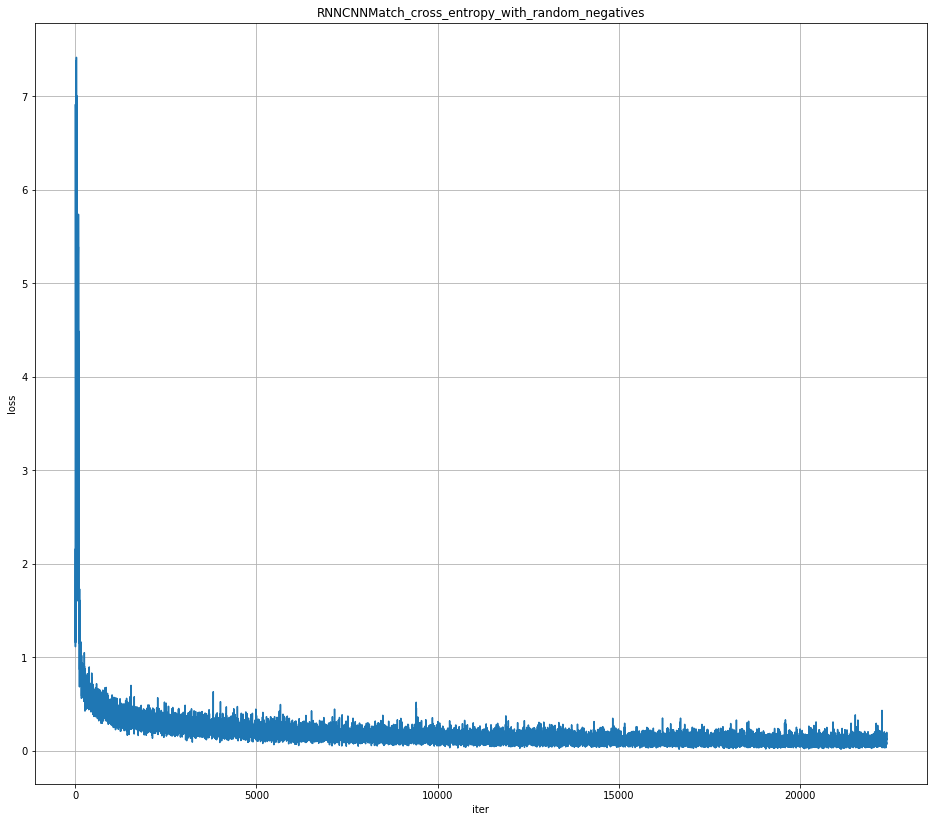

In [7]:
rcm.train(epochs=15, verbose=config.VERBOSE)